In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras import layers, models, datasets, preprocessing
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd

drive.mount('/content/drive/')

IMAGE_SIZE = (256,256)
BATCH_SIZE = 32

#Take out data set and shuffle it
data = tf.keras.utils.image_dataset_from_directory('drive/MyDrive/data', image_size = IMAGE_SIZE, batch_size = BATCH_SIZE)

Mounted at /content/drive/
Found 4188 files belonging to 4 classes.


In [ ]:
#Scale the images down to make for more efficient testing
data = data.map(lambda x,y: (x/255, y))

class_names = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

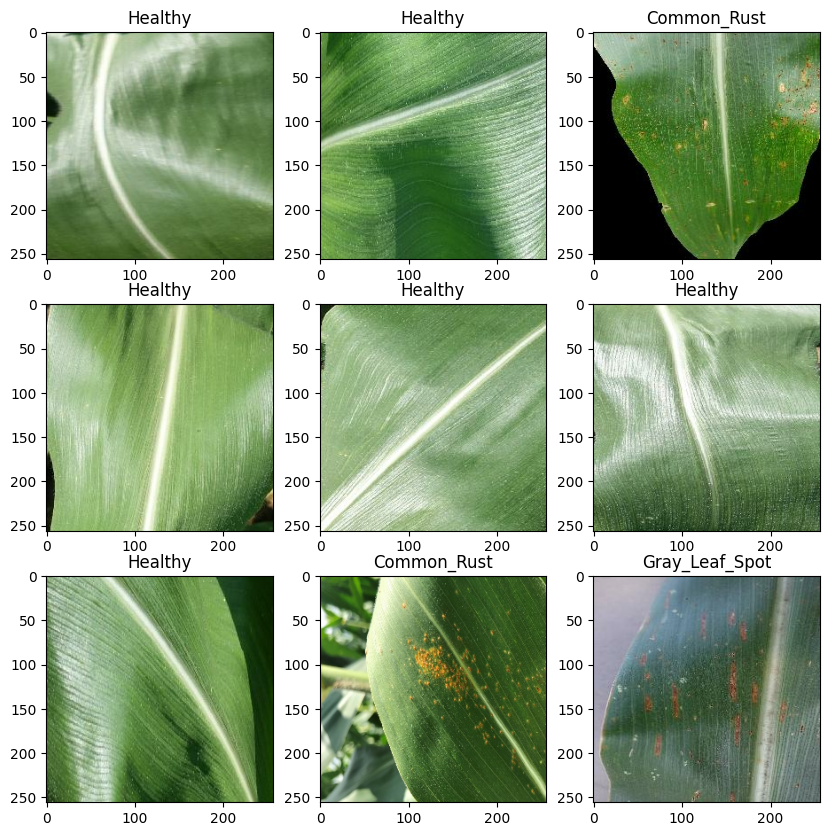

In [ ]:
#Show what a batch looks like and make sure it's returning the proper image.
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
fig, ax = plt.subplots(ncols=3, nrows = 3, figsize = (10,10))
for idx, img in enumerate(batch[0][:9]):
  row = idx // 3
  col = idx % 3
  ax[row,col].imshow(img)
  ax[row,col].title.set_text(class_names[batch[1][idx]])

In [ ]:
#Partition data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int((len(data) - val_size - train_size))

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
epochs = 30

history = model.fit(train, epochs = epochs, batch_size = BATCH_SIZE, validation_data = val)

Epoch 1/30
91/91 [==============================] - 494s 5s/step - loss: 0.9493 - accuracy: 0.5594 - val_loss: 0.6931 - val_accuracy: 0.7476
Epoch 2/30
91/91 [==============================] - 35s 374ms/step - loss: 0.5570 - accuracy: 0.7706 - val_loss: 0.5843 - val_accuracy: 0.7825
Epoch 3/30
91/91 [==============================] - 34s 365ms/step - loss: 0.4155 - accuracy: 0.8331 - val_loss: 0.4783 - val_accuracy: 0.8005
Epoch 4/30
91/91 [==============================] - 35s 377ms/step - loss: 0.3898 - accuracy: 0.8420 - val_loss: 0.3981 - val_accuracy: 0.8245
Epoch 5/30
91/91 [==============================] - 35s 374ms/step - loss: 0.3215 - accuracy: 0.8626 - val_loss: 0.3695 - val_accuracy: 0.8474
Epoch 6/30
91/91 [==============================] - 34s 366ms/step - loss: 0.3079 - accuracy: 0.8767 - val_loss: 0.3456 - val_accuracy: 0.8618
Epoch 7/30
91/91 [==============================] - 34s 366ms/step - loss: 0.2907 - accuracy: 0.8788 - val_loss: 0.3219 - val_accuracy: 0.8738
E

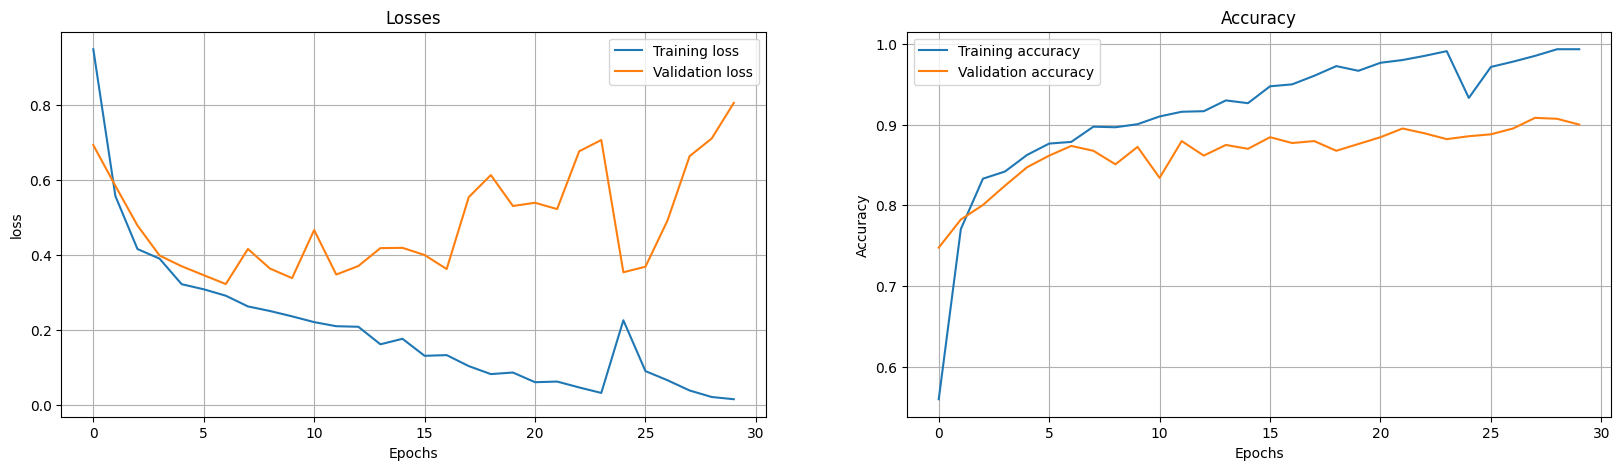

In [ ]:
his_data = pd.DataFrame(history.history)
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(his_data.loss, label="Training loss")
plt.plot(his_data.val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Losses")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(his_data.accuracy, label="Training accuracy")
plt.plot(his_data.val_accuracy, label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.grid()
plt.legend()

In [ ]:
predicted_classes = []
true_labels = []
y_score = []
for images, labels in test:
    # Predict probabilities for each class
    predictions_prob = model.predict(images)
    y_score.extend(predictions_prob)
    # Convert probabilities to class labels
    predicted_class = predictions_prob.argmax(axis=1)

    # Append true labels and predicted classes to the lists
    true_labels.extend(labels.numpy())  # Convert labels tensor to numpy array
    predicted_classes.extend(predicted_class)

1/1 [==============================] - 0s 29ms/step


In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc
accuracy = accuracy_score(true_labels, predicted_classes)

444

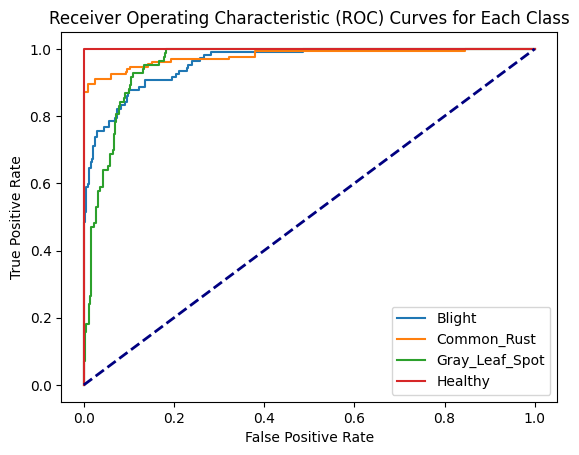

<Figure size 800x600 with 0 Axes>

In [ ]:
for i in range(4):
  y_true_binary = np.array([1 if label == i else 0 for label in true_labels])

  fpr, tpr, _ = roc_curve(y_true_binary, np.array(y_score)[:,i], drop_intermediate=False)
  roc_auc = auc(fpr, tpr)

  plt.plot(fpr, tpr, label=f'{class_names[i]}')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.legend(loc="lower right")
plt.figure(figsize=(8, 6))
plt.show()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              